In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
%matplotlib inline

(400, 2)


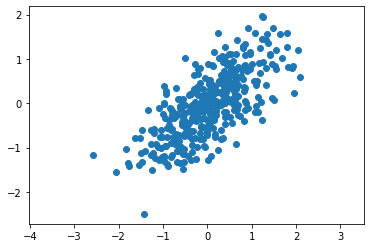

In [11]:
rng = np.random.RandomState(0)
X = rng.randn(2, 400)   # 2x400 array

scale  =  np.array([[1,0], [0, 0.4]])    # Standard deviations are 1 and 0.4
rotate = np.array([[1, -1], [1, 1]]) / math.sqrt(2)     # angle: -45 and 45 degree
transform = np.dot(rotate, scale)
X = np.dot(transform, X)

X = X.T     # 400 pairs (x, y)
print(X.shape)

plt.axis('equal')
plt.scatter(X[:,0], X[:,1])

In [12]:
from sklearn.decomposition import PCA
def arrow(v1, v2, ax):
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate("", v2, v1, arrowprops=arrowprops)
pca = PCA(2)
pca.fit(X)
print("Principal axes:", pca.components_)
print("Explained variance:", pca.explained_variance_)
print("Mean:", pca.mean_)

Principal axes: [[-0.73072907 -0.68266758]
 [-0.68266758  0.73072907]]
Explained variance: [0.97980663 0.16031015]
Mean: [ 0.01333067 -0.05370929]


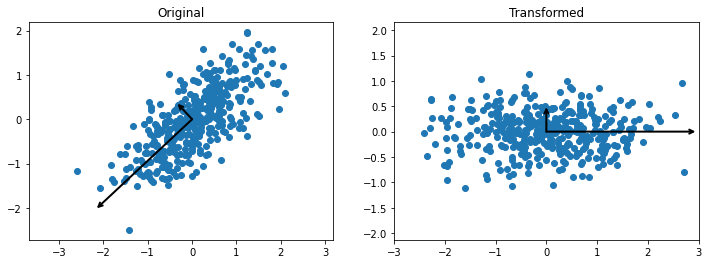

In [13]:
Z = pca.transform(X)
fig, axes = plt.subplots(1,2, figsize=(12,4))

axes[0].set_title("Original")
axes[0].axis('equal')
axes[0].scatter(X[:,0], X[:,1])

axes[1].set_title("Transformed")
axes[1].axis('equal')
axes[1].set_xlim(-3,3)
axes[1].scatter(Z[:,0], Z[:,1])

for l, v in zip(pca.explained_variance_, pca.components_):
    arrow([0,0], v*l*3, axes[0])
for l, v in zip(pca.explained_variance_, [np.array([1.0, 0.0]),np.array([0.0, 1.0])]):
    arrow([0,0], v*l*3, axes[1])


[[-0.73072907 -0.68266758]]
[0.97980663]


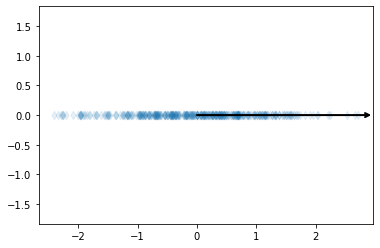

In [24]:
pca = PCA(n_components=1)
pca.fit(X)
Z = pca.transform(X)
print(pca.components_)
print(pca.explained_variance_)
plt.axis('equal')
plt.scatter(Z[:,0], np.zeros(400), marker="d", alpha=0.1)
for l, v in zip([pca.explained_variance_, 0], [np.array([1.0, 0.0]),np.array([0.0, 1.0])]):
    arrow([0, 0], v*l*3, plt)